<h2>Imports and Functions</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [4]:
def to_int(num):
    return int(num)
to_int_vectorized = np.vectorize(to_int)

<h2>Data Analysis</h2>

In [5]:
player_pickles = os.listdir('player_stats')

<h3>NBA Historical Averages</h3>

In [5]:
player_avg_season_lengths = []
player_avg_ppg = []
player_avg_gp = []
for player_pickle in player_pickles:
    try:
        player_stats = pd.read_pickle('player_stats/'+player_pickle)
        if player_stats.index.values.dtype != 'int64':
            player_stats = player_stats.reindex(to_int_vectorized(player_stats.index.values), axis = 0)
            player_stats['G'] = to_int_vectorized(player_stats['G'].values)
            player_stats.to_pickle('player_stats/'+player_pickle)
        player_avg_season_lengths.append(len(player_stats.index.values))
#         print(player_stats['PTS'].values)
        player_avg_ppg.append(np.mean(player_stats['PTS'].values))
        player_avg_gp.append(np.mean(player_stats['G'].values))
    except:
        continue
player_avg_season_lengths = np.array(player_avg_season_lengths)
# print(len(player_avg_season_lengths))
# print(len(player_avg_ppg))
player_avg_ppg = np.array(player_avg_ppg)
player_avg_gp = np.array(player_avg_gp)
print('The average NBA player played',round(np.mean(player_avg_season_lengths),3),'seasons')
print('The average NBA player scores',round(np.mean(player_avg_ppg)),'ppg')
print('The average NBA player played',round(np.mean(player_avg_gp),0),'games per season')


The average NBA player played 5.308 seasons
The average NBA player scores 6.0 ppg
The average NBA player played 42.0 games per season


<h3>Plotting NBA Stats</h3>

<h3>Comparision Between Drafted at Ages 18/19 and at 20/21/22</h3>

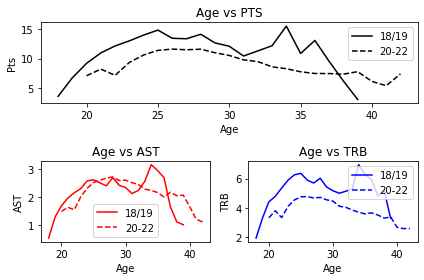

In [25]:
# Age DataFrames
ages_18_19 = pd.DataFrame()
ages_20_22 = pd.DataFrame()

# Separating Players in different categories
for player_pickle in player_pickles:
    try:
        player = pd.read_pickle('player_stats/'+player_pickle)
        player_ages = player.index.values
        if 18 in player_ages or 19 in player_ages:
            ages_18_19 = ages_18_19.append(player)
        elif 20 in player_ages or 21 in player_ages or 22 in player_ages:
            ages_20_22 = ages_20_22.append(player)
    except:
        continue

# Aggregate values
ages_18_19 = ages_18_19.groupby(ages_18_19.index).mean()
ages_20_22 = ages_20_22.groupby(ages_20_22.index).mean()

# Adding figures and axes
stats = plt.figure()
pts = stats.add_subplot(211)
ast = stats.add_subplot(223)
trb = stats.add_subplot(224)

# Points
pts.plot(ages_18_19.index, ages_18_19['PTS'], color='black',label='18/19')
pts.plot(ages_20_22.index, ages_20_22['PTS'], color='black',label='20-22',linestyle='--')
pts.set_xlabel('Age')
pts.set_ylabel('Pts')
pts.set_title('Age vs PTS')
pts.legend()

# Assists
ast.plot(ages_18_19.index, ages_18_19['AST'], color='red',label='18/19')
ast.plot(ages_20_22.index, ages_20_22['AST'], color='red',label='20-22',linestyle='--')
ast.set_xlabel('Age')
ast.set_ylabel('AST')
ast.set_title('Age vs AST')
ast.legend()

# Rebounds
trb.plot(ages_18_19.index, ages_18_19['TRB'], color='blue',label='18/19')
trb.plot(ages_20_22.index, ages_20_22['TRB'], color='blue',label='20-22',linestyle='--')
trb.set_xlabel('Age')
trb.set_ylabel('TRB')
trb.set_title('Age vs TRB')
trb.legend()

plt.tight_layout()
plt.show()


<h3>Player Stats Box Plots</h3>

pts:  50.4
ast:  14.5
trb:  27.2


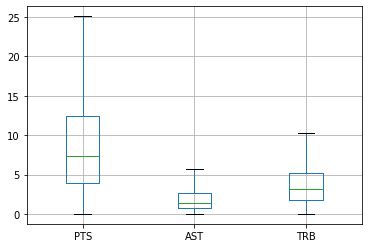

In [37]:
all_player_box_plot = pd.DataFrame()

for player_pickle in player_pickles:
    try:
        player = pd.read_pickle('player_stats/'+player_pickle)
        all_player_box_plot = all_player_box_plot.append(player)
    except:
        continue
        
all_player_box_plot.boxplot(['PTS','AST','TRB'], showfliers=False)

<h3>Player Stats Age Breakdown</h3>

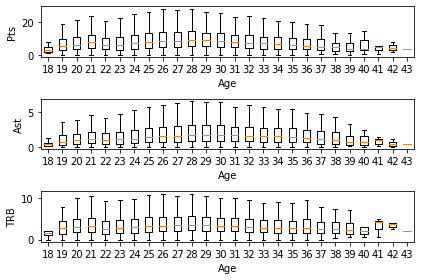

In [131]:
temp_pts_box_plot, pts_box_plot = {}, {}
temp_ast_box_plot, ast_box_plot = {}, {}
temp_trb_box_plot, trb_box_plot = {}, {}

# Separating 
for player_pickle in player_pickles:
    try:
        player_stats = pd.read_pickle('player_stats/'+player_pickle)
        for age, pt, ast, trb in zip(player_stats.index, player_stats.loc[:,'PTS'], player_stats.loc[:,'AST'], player_stats.loc[:,'TRB']):
            if age not in temp_pts_box_plot:
                temp_pts_box_plot[age] = [pt]
            else:
                temp_pts_box_plot[age].append(pt)
            if age not in temp_ast_box_plot:
                temp_ast_box_plot[age] = [ast]
            else:
                temp_ast_box_plot[age].append(ast)
            if age not in temp_trb_box_plot:
                temp_trb_box_plot[age] = [trb]
            else:
                temp_trb_box_plot[age].append(trb)
    except:
        continue

# Plotting
box_plots = plt.figure()
pts_plot = box_plots.add_subplot(311, xlabel='Age', ylabel='Pts')
ast_plot = box_plots.add_subplot(312, xlabel='Age', ylabel='Ast')
trb_plot = box_plots.add_subplot(313, xlabel='Age', ylabel='TRB')

keys = []
for key in temp_pts_box_plot.keys():
    keys.append(key)
keys.sort()

for key in keys:
    pts_box_plot[key] = temp_pts_box_plot[key]
    ast_box_plot[key] = temp_ast_box_plot[key]
    trb_box_plot[key] = temp_trb_box_plot[key]

for trb_keys in trb_box_plot.keys():
    for index, val in zip(np.arange(len(trb_box_plot[trb_keys])), trb_box_plot[trb_keys]):
        if math.isnan(val):
            trb_box_plot[trb_keys][index] = 0.2
    
pts_plot.boxplot(pts_box_plot.values(), showfliers=False, labels=pts_box_plot.keys())
ast_plot.boxplot(ast_box_plot.values(), showfliers=False, labels=ast_box_plot.keys())
trb_plot.boxplot(trb_box_plot.values(), showfliers=False, labels=trb_box_plot.keys())

plt.tight_layout()
plt.show()
